In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [2]:
house_price_df = pd.read_csv('banglore.csv')

In [3]:
# Displaying 1st 5 records  

house_price_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# total number of rows and columns in dataframe(r,c)
house_price_df.shape

(13320, 9)

In [5]:
# displaying only columns
house_price_df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
# basic information about dataframe
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


It shows us total number of non-null values in each column and their datatype

In [7]:
# datatype of each column 
house_price_df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [8]:
# statistical information of numerical column
house_price_df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
# statistical information about categorical columns
house_price_df.describe(include='O')

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


## 1. NaN values

In [10]:
# total number of nan values in each column
house_price_df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
# NaN values in each column in percentage
house_price_df.isnull().sum()/len(house_price_df)*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

#### Handling NaN values 

**Society**

In [12]:
# Since Society column contains more than 40% NaN values we drop the society column

house_price_df.drop(['society'],axis=1,inplace=True)

**location**

In [13]:
# Since location column has few nan values we can fill those values using mode() as it is categorial column

house_price_df['location'].fillna(house_price_df['location'].mode()[0],inplace=True)

**size**

In [14]:
# again filling size column with mode as it has less number of nan values

house_price_df['size'].fillna(house_price_df['size'].mode()[0],inplace=True)

**bath**

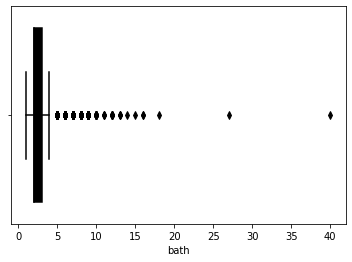

In [15]:
# 1st we will check if outliers present in bath if outliers are present we will fill them with median()

sns.boxplot(x=house_price_df['bath'],color='Black')
plt.show()

From the graph we can conclude that bath column has outliers in it
so we will use median() to fill nan values

In [16]:
house_price_df['bath'].fillna(house_price_df['bath'].median(),inplace=True)

**balcony**

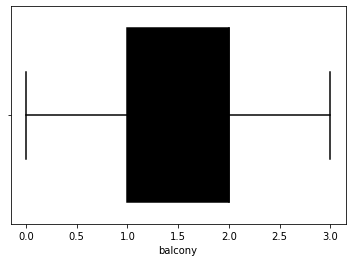

In [17]:
# 1st we need to check if outliers present in balcony column if outliers are present we will fill them with median()

sns.boxplot(x=house_price_df['balcony'],color='Black')
plt.show()

 Balcony column doesnt have any outlier present in it

In [18]:
house_price_df['balcony'].mean()

1.5843757375501535

In [19]:
house_price_df['balcony'].median()

2.0

In [20]:
# Since balcony cannot be 1.5 balcony it either can be 1 balcony or 2 balconys
# so we fill nan values with median()

house_price_df['balcony'].fillna(house_price_df['balcony'].median(),inplace=True)

now we check for nan values and their dtypes to ensure that we didnt mess things up

In [21]:
house_price_df.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [22]:
house_price_df.isnull().any()

area_type       False
availability    False
location        False
size            False
total_sqft      False
bath            False
balcony         False
price           False
dtype: bool

## 2. Duplicates

In [23]:
house_price_df.duplicated().any()

True

In [24]:
house_price_df.drop_duplicates(inplace=True)

## 3. Cleaning Data

**size**

In [25]:
# total number of unique records in size

house_price_df['size'].nunique()

31

In [26]:
# checking unique data and their total numbers

house_price_df['size'].value_counts()

2 BHK         4919
3 BHK         4108
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [27]:
# size column has various units like bedroom, bhk ,rk 
# we will convert it into single unit - BHK and remove 1rk

In [28]:
def clean_size(x):
    if 'BHK' in x:
        x = x.split(' ')[0]
        return int(x)
    elif 'Bedroom' in x:
        x = x.split(' ')[0]
        return int(x)
    elif 'RK' in x:
        x = np.nan
    else :
        int(x)

In [29]:
house_price_df['size_in_BHK'] = house_price_df['size'].map(clean_size)

In [30]:
house_price_df.dropna(subset='size_in_BHK',inplace=True)

In [31]:
house_price_df.shape

(12738, 9)

### total_sqft

In [32]:
# total number of unique records in total_sqft column
house_price_df.total_sqft.nunique()

2113

In [33]:
#  unique records and their total

house_price_df.total_sqft.value_counts()

1200           803
1100           209
1500           202
2400           196
600            178
              ... 
785              1
2563 - 2733      1
2005             1
605 - 624        1
4689             1
Name: total_sqft, Length: 2113, dtype: int64

In [34]:
# generally area for room is in square feet and it is in numerical format
# so converting it into numerical col
def clean_sqft(x):
    if '-' in x:
        x1, x2 = x.split('-')
        x = (float(x1.strip()) + float(x2.strip()))/2
        return float(x)
    elif 'Sq. Meter' in x:
        return np.nan
    elif 'Guntha' in x:
        return np.nan
    elif 'Acres' in x:
        return np.nan
    elif 'Cents' in x:
        return np.nan
    elif 'Sq. Yards' in x:
        return np.nan
    elif 'Perch' in x:
        return np.nan
    elif 'Grounds' in x:
        return np.nan
    else:
        try:
            if x:
                return float(x)
        except:
            return np.nan

In [35]:
# assigning numeric sqft to sqft column 

house_price_df['sqft']=house_price_df['total_sqft'].map(clean_sqft)
house_price_df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price', 'size_in_BHK', 'sqft'],
      dtype='object')

In [36]:
# deleting NaN values which we introduced in sqft column

house_price_df.dropna(subset=['sqft'],inplace = True)


In [37]:
house_price_df['sqft'].isnull().sum()

0

In [38]:
# creating new column for price per sqft

house_price_df['price_per_sqft'] = (house_price_df['price'] * 100000 / house_price_df['sqft'])

#### Converting datatype of bath, size_in_BHK and balcony in int datatype

In [39]:
house_price_df.dtypes

area_type          object
availability       object
location           object
size               object
total_sqft         object
bath              float64
balcony           float64
price             float64
size_in_BHK       float64
sqft              float64
price_per_sqft    float64
dtype: object

In [40]:
house_price_df=house_price_df.astype({'size_in_BHK':'int','bath':'int','balcony':'int'})

In [41]:
house_price_df.dtypes

area_type          object
availability       object
location           object
size               object
total_sqft         object
bath                int32
balcony             int32
price             float64
size_in_BHK         int32
sqft              float64
price_per_sqft    float64
dtype: object

## 4. Outliers

**Price per feet**

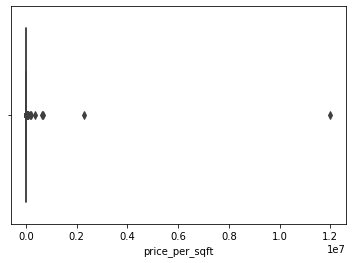

In [42]:
sns.boxplot(x=house_price_df['price_per_sqft'])
plt.show()

In [43]:
# handling outliers using standard deviation

sd_sqft = house_price_df['price_per_sqft'].std()
print(f'standard deviation for sqft{sd_sqft}')
mean_sqft = house_price_df['price_per_sqft'].mean()
print(f'mean sqft: {mean_sqft}')

lower_limit =  mean_sqft - 3 * sd_sqft
print(f'lower limit: {lower_limit}')
upper_limit = mean_sqft + 3 * sd_sqft
print(f'upper limit: {upper_limit}')

standard deviation for sqft108839.78118184546
mean sqft: 8036.0871828610725
lower limit: -318483.25636267534
upper limit: 334555.43072839745


In [44]:
non_outlier = house_price_df[(house_price_df['price_per_sqft'] > lower_limit) & (house_price_df['price_per_sqft'] < upper_limit)]
non_outlier.shape

(12687, 11)


**bath**

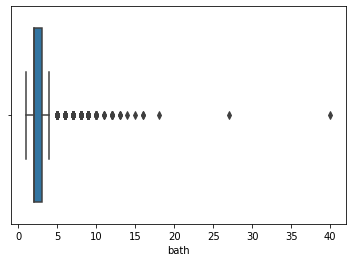

In [45]:
sns.boxplot(house_price_df['bath'])
plt.show()

In [46]:
# handling outliers using IQR

q1 = house_price_df['bath'].quantile(0.25)
q3 = house_price_df['bath'].quantile(0.75)
IQR = q3-q1

lower_limit = q1 - 1.5*IQR
print(f'lower limit for bath: {lower_limit}')
upper_limit = q3 + 1.5*IQR
print(f'upper limit for bath:{upper_limit}')

lower limit for bath: 0.5
upper limit for bath:4.5


In [47]:
non_outlier.shape

(12687, 11)

In [48]:
non_outlier = non_outlier[(non_outlier['bath'] > lower_limit) &(non_outlier['bath'] < upper_limit)]

In [49]:
non_outlier.shape

(11665, 11)

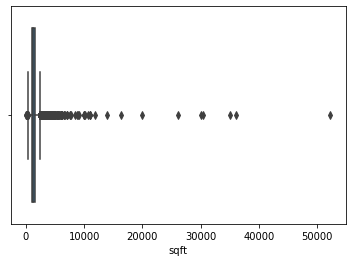

In [50]:
sns.boxplot(non_outlier['sqft'])
plt.show()

In [51]:
q1 = non_outlier['sqft'].quantile(0.25)
q3 = non_outlier['sqft'].quantile(0.75)
IQR = q3-q1

lower_limit = q1 - 1.5*IQR
print(f'lower limit for sqft: {lower_limit}')
upper_limit = q3 + 1.5*IQR
print(f'upper limit for sqft:{upper_limit}')

lower limit for sqft: 317.0
upper limit for sqft:2397.0


In [52]:
non_outlier = non_outlier[(non_outlier['sqft'] > lower_limit) & (non_outlier['sqft'] < upper_limit)]
non_outlier.shape

(10726, 11)

### Dropping irrelevant columns

In [53]:
non_outlier.dtypes

area_type          object
availability       object
location           object
size               object
total_sqft         object
bath                int32
balcony             int32
price             float64
size_in_BHK         int32
sqft              float64
price_per_sqft    float64
dtype: object

In [54]:
non_outlier.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,size_in_BHK,sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2,1,39.07,2,1056.0,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2,3,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3,1,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2,1,51.00,2,1200.0,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2,1,38.00,2,1170.0,3247.863248


In [55]:
non_outlier.drop(columns=['size','total_sqft','price'],axis=1,inplace=True)


In [56]:
non_outlier.head()

,area_type,availability,location,bath,balcony,size_in_BHK,sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1,2,1056.0,3699.810606
2,Built-up Area,Ready To Move,Uttarahalli,2,3,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,1,2,1200.0,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2,1,2,1170.0,3247.863248


### Analysing the data

##### area_type

In [57]:
area_type = non_outlier['area_type'].value_counts()
area_type

Super built-up  Area    7593
Built-up  Area          1940
Plot  Area              1115
Carpet  Area              78
Name: area_type, dtype: int64

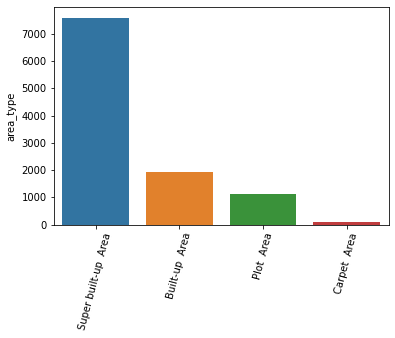

In [58]:
# barplot for area_type
sns.barplot(x=area_type.index, y = area_type )
plt.xticks(rotation=75)
plt.show()

super built-up area is most frequent area type where as carpet area is least

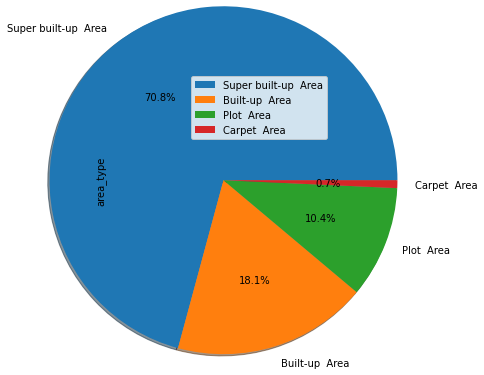

In [59]:
# barplot

mylabels = area_type.index
plt.figure(figsize=(4,4))
(area_type).plot.pie(autopct="%.1f%%",shadow=True,labels=mylabels,radius=2)
plt.legend(loc ='best')
plt.show()

# area_type.plot.pie(autopct="%.1f%%",figsize=(7,7))
# plt.show()

super built-up area is 71% -the most where as carpet area is least 0.7%

##### availability

In [60]:
availability = non_outlier['availability'].value_counts().head(10)
availability

Ready To Move    8411
18-May            262
18-Apr            244
18-Dec            239
18-Aug            179
19-Dec            152
18-Jul            121
18-Mar            106
18-Jun             89
20-Dec             87
Name: availability, dtype: int64

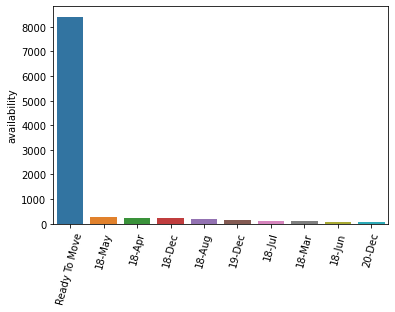

In [61]:
sns.barplot(x = availability.index, y = availability)
plt.xticks(rotation= 75)
plt.show()

More than 8000 houses are ready to move among the top 10 availability

<AxesSubplot:ylabel='availability'>

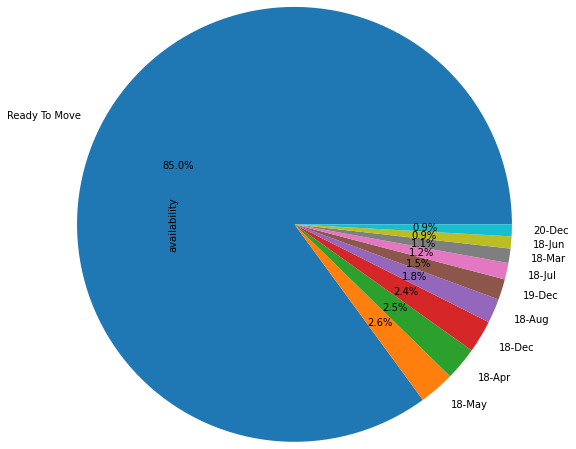

In [62]:
# pie chart
availability.plot.pie(autopct="%.1f%%",radius=2.5)

85% percent houses are ready to move among the top 10 availability

##### Location

In [63]:
#  first 25 most frequent loaction
location = non_outlier['location'].value_counts().head(25) 
location

Whitefield                  415
Sarjapur  Road              318
Electronic City             281
Kanakpura Road              232
Thanisandra                 217
Yelahanka                   183
Raja Rajeshwari Nagar       152
Uttarahalli                 146
Marathahalli                144
Bannerghatta Road           134
Hennur Road                 132
Electronic City Phase II    124
7th Phase JP Nagar          118
Hebbal                      109
Haralur Road                 86
Electronics City Phase 1     86
Bellandur                    83
Hoodi                        81
Chandapura                   78
KR Puram                     75
Kasavanhalli                 72
Yeshwanthpur                 71
Harlur                       68
Hormavu                      67
Rajaji Nagar                 67
Name: location, dtype: int64

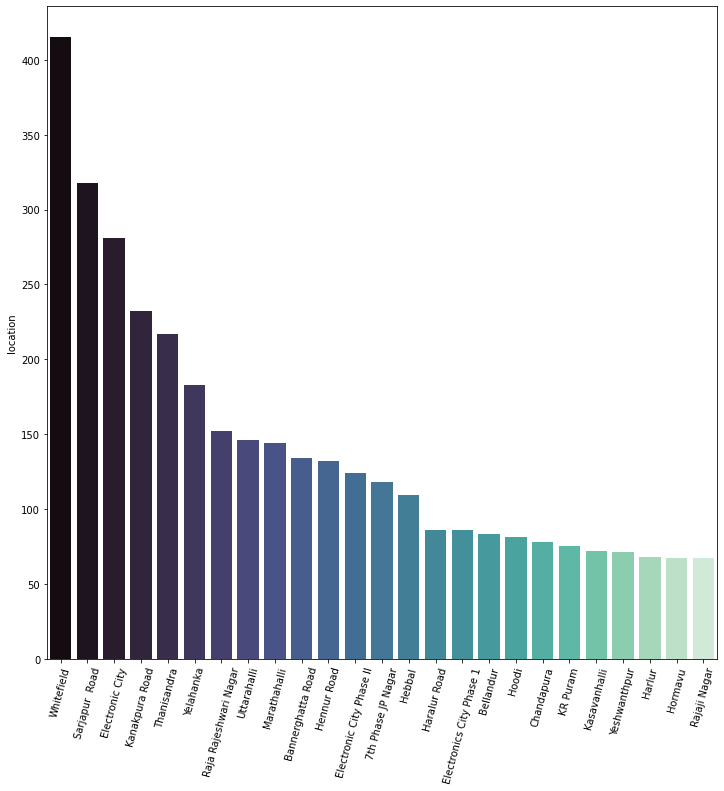

In [64]:
sns.color_palette("mako", as_cmap=True)
plt.figure(figsize=(12,12))
sns.barplot(x = location.index, y = location,palette='mako')
plt.xticks(rotation=75)
plt.show()

The most frequent location among the top 25 location is Whitefield with almost 400 counts

##### bath

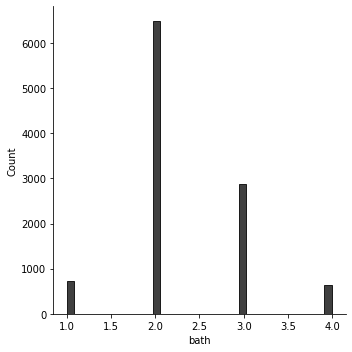

In [65]:
# histogram
sns.displot(x = non_outlier['bath'],color='black')
plt.show()

The most common number of bath per house is 2 and the least is 1 and 4 

##### balcony

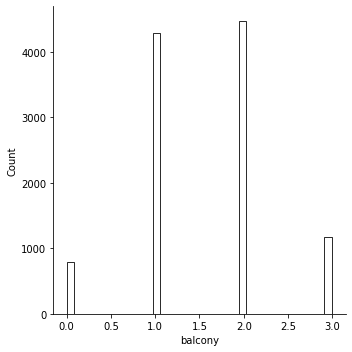

In [66]:
sns.displot(x = non_outlier['balcony'],color='white')

The most common number for balcony is 1 and 2 

both balcony 1 and 2 have count more than 4000

##### size_in_BHK

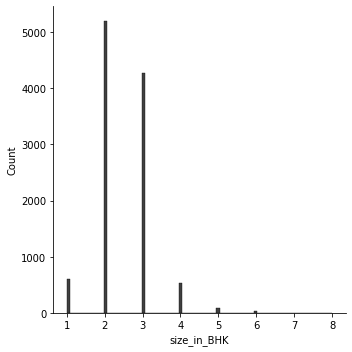

In [67]:
sns.displot(x= non_outlier['size_in_BHK'],color='black')
plt.show()

The most number of house sizes are 2 which is more than 5000

and 3BHK are the 2nd most preference

##### price per sqft

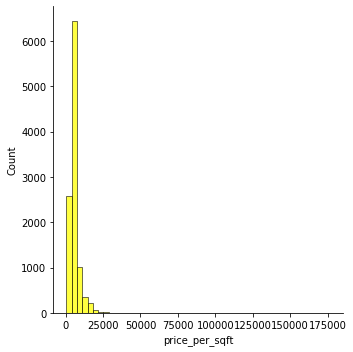

In [68]:
sns.displot(x = non_outlier['price_per_sqft'], color= 'yellow',bins=50)
plt.show()

The price per sq feet range is somewhere around between 1800 to 10000

the graph is highly right skewed

Text(0.5, 0, 'Price')

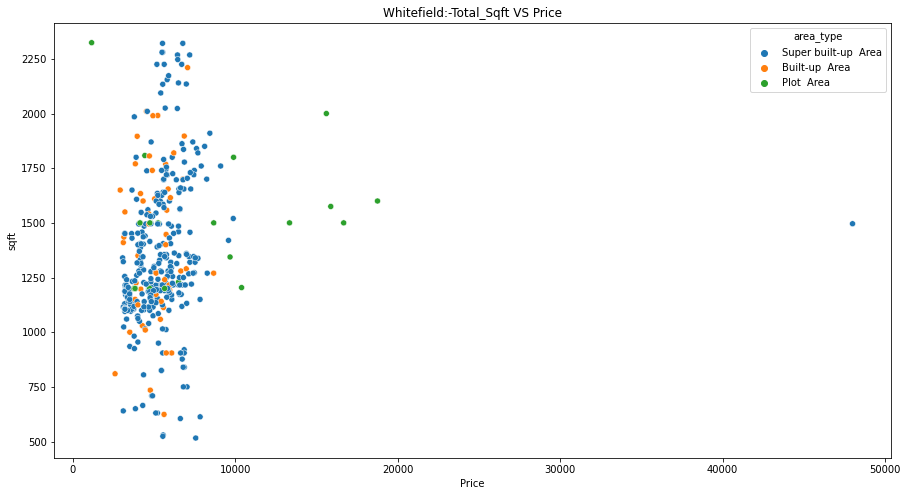

In [69]:
# scatterplot between price and total_sqft for whitfield area
plt.figure(figsize=(15,8))
place = 'Whitefield'   # here location can be changed,as whitefield had highest number of house so selected it
df = non_outlier[non_outlier['location']== place]  
sns.scatterplot(df['price_per_sqft'],df['sqft'],hue=df['area_type'])
plt.title('Whitefield:-Total_Sqft VS Price')
plt.xlabel('Price')

from 500 sqft to more than 2250 super built up area areatype is available at around 10000 or less price in whitefield location

built up area and plot area are very less as compared to super built up area in whitefield locatoin

In [70]:
non_outlier.columns

Index(['area_type', 'availability', 'location', 'bath', 'balcony',
       'size_in_BHK', 'sqft', 'price_per_sqft'],
      dtype='object')

In [71]:
corr=non_outlier.corr()
corr

,bath,balcony,size_in_BHK,sqft,price_per_sqft
bath,1.000000,0.273641,0.777301,0.598871,0.294996
balcony,0.273641,1.000000,0.230407,0.326120,-0.015717
size_in_BHK,0.777301,0.230407,1.000000,0.535042,0.302141
sqft,0.598871,0.326120,0.535042,1.000000,0.077571
price_per_sqft,0.294996,-0.015717,0.302141,0.077571,1.000000


<AxesSubplot:>

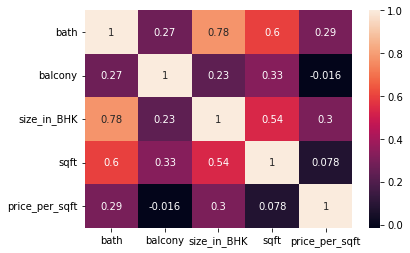

In [72]:
sns.heatmap(corr,annot=True)

as the bath increases balcony and price_per_sqft also minorly increases but size_in_bhk and sqft significantly increases.

as size_in_BHK increases ofc bath,balcony,sqft,price_per_sqft also increases

it is very rare case that as the balcony has increased price_per_sqft decreased

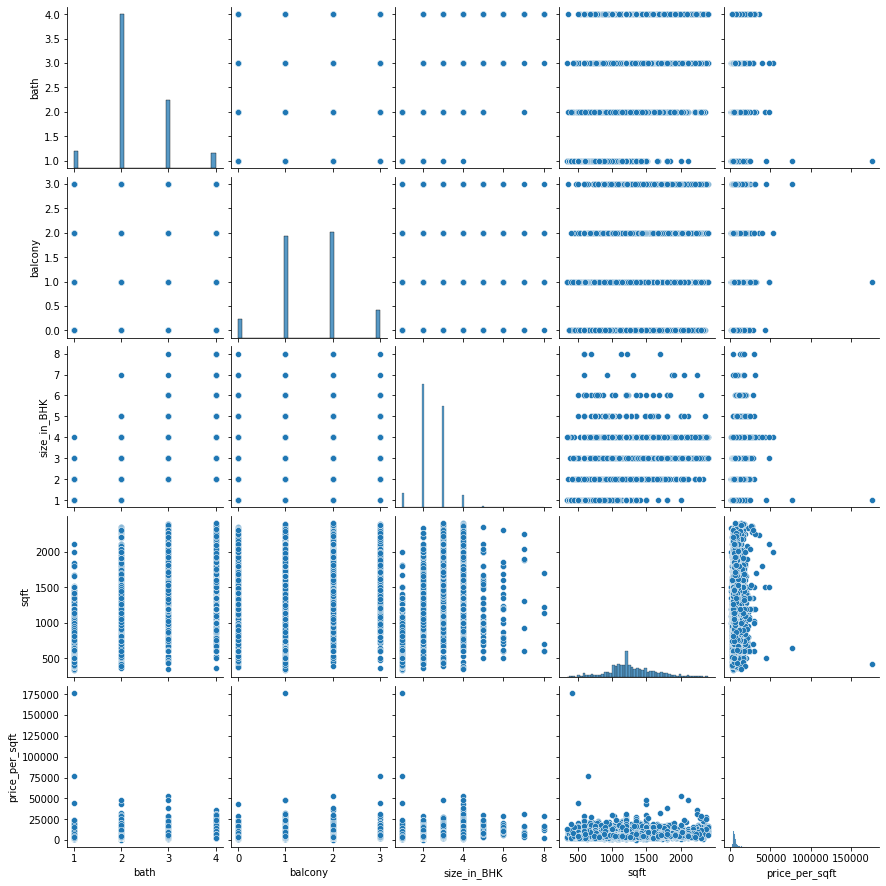

In [73]:
sns.pairplot(non_outlier)

<AxesSubplot:xlabel='price_per_sqft', ylabel='area_type'>

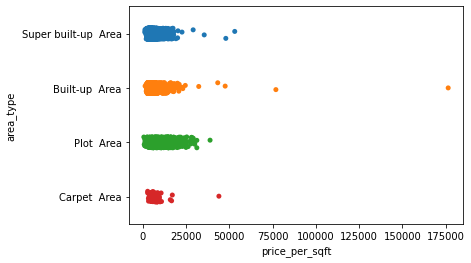

In [74]:
#strip plot 1numeric 1 categorical

sns.stripplot('price_per_sqft','area_type',data=non_outlier)

regardless of area_type price per sqft is same for most of the data

<AxesSubplot:xlabel='sqft', ylabel='area_type'>

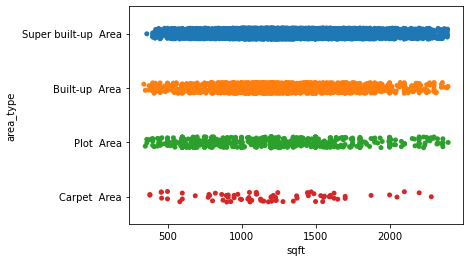

In [75]:
sns.stripplot('sqft','area_type',data=non_outlier)

super built-up area provides wide range of sqft choices whereas

next to super built-up area built up area provides wide range of sqft choices

next to builtup area area plot area provides sqft choices

and carpet area type provides leaset sqft choices